## Data Understanding 

In [4]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [5]:
df = pd.read_csv(r"/content/drive/MyDrive/football_data.csv")

In [7]:
df.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Real Face,Position,Jersey Number,Joined,Loaned From,Contract Valid Until,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,...,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,€110.5M,€565K,2202,Left,5.0,4.0,4.0,Medium/ Medium,Messi,Yes,RF,10.0,"Jul 1, 2004",NaN,2021,5'7,159lbs,88+2,88+2,88+2,92+2,93+2,93+2,93+2,92+2,93+2,93+2,93+2,91+2,...,59+2,47+2,47+2,47+2,59+2,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,€77M,€405K,2228,Right,5.0,4.0,5.0,High/ Low,C. Ronaldo,Yes,ST,7.0,"Jul 10, 2018",NaN,2022,6'2,183lbs,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,...,61+3,53+3,53+3,53+3,61+3,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,€118.5M,€290K,2143,Right,5.0,5.0,5.0,High/ Medium,Neymar,Yes,LW,10.0,"Aug 3, 2017",NaN,2022,5'9,150lbs,84+3,84+3,84+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,88+3,...,60+3,47+3,47+3,47+3,60+3,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,€72M,€260K,1471,Right,4.0,3.0,1.0,Medium/ Medium,Lean,Yes,GK,1.0,"Jul 1, 2011",NaN,2020,6'4,168lbs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,€102M,€355K,2281,Right,4.0,5.0,4.0,High/ High,Normal,Yes,RCM,7.0,"Aug 30, 2015",NaN,2023,5'11,154lbs,82+3,82+3,82+3,87+3,87+3,87+3,87+3,87+3,88+3,88+3,88+3,88+3,...,73+3,66+3,66+3,66+3,73+3,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [8]:
df.shape

(18207, 89)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 89 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                18207 non-null  int64  
 1   ID                        18207 non-null  int64  
 2   Name                      18207 non-null  object 
 3   Age                       18207 non-null  int64  
 4   Photo                     18207 non-null  object 
 5   Nationality               18207 non-null  object 
 6   Flag                      18207 non-null  object 
 7   Overall                   18207 non-null  int64  
 8   Potential                 18207 non-null  int64  
 9   Club                      17966 non-null  object 
 10  Club Logo                 18207 non-null  object 
 11  Value                     18207 non-null  object 
 12  Wage                      18207 non-null  object 
 13  Special                   18207 non-null  int64  
 14  Prefer

In [10]:
df.describe()

,Unnamed: 0,ID,Age,Overall,Potential,Special,International Reputation,Weak Foot,Skill Moves,Jersey Number,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
count,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18159.000000,18159.000000,18159.000000,18147.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000
mean,9103.000000,214298.338606,25.122206,66.238699,71.307299,1597.809908,1.113222,2.947299,2.361308,19.546096,49.734181,45.550911,52.298144,58.686712,42.909026,55.371001,47.170824,42.863153,52.711933,58.369459,64.614076,64.726967,63.503607,61.836610,63.966573,55.460047,65.089432,63.219946,65.311967,47.109973,55.868991,46.698276,49.958478,53.400903,48.548598,58.648274,47.281623,47.697836,45.661435,16.616223,16.391596,16.232061,16.388898,16.710887
std,5256.052511,29965.244204,4.669943,6.908930,6.136496,272.586016,0.394031,0.660456,0.756164,15.947765,18.364524,19.525820,17.379909,14.699495,17.694408,18.910371,18.395264,17.478763,15.327870,16.686595,14.927780,14.649953,14.766049,9.010464,14.136166,17.237958,11.820044,15.894741,12.557000,19.260524,17.367967,20.696909,19.529036,14.146881,15.704053,11.436133,19.904397,21.664004,21.289135,17.695349,16.906900,16.502864,17.034669,17.955119
min,0.000000,16.000000,16.000000,46.000000,48.000000,731.000000,1.000000,1.000000,1.000000,1.000000,5.000000,2.000000,4.000000,7.000000,4.000000,4.000000,6.000000,3.000000,9.000000,5.000000,12.000000,12.000000,14.000000,21.000000,16.000000,2.000000,15.000000,12.000000,17.000000,3.000000,11.000000,3.000000,2.000000,10.000000,5.000000,3.000000,3.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,4551.500000,200315.500000,21.000000,62.000000,67.000000,1457.000000,1.000000,3.000000,2.000000,8.000000,38.000000,30.000000,44.000000,54.000000,30.000000,49.000000,34.000000,31.000000,43.000000,54.000000,57.000000,57.000000,55.000000,56.000000,56.000000,45.000000,58.000000,56.000000,58.000000,33.000000,44.000000,26.000000,38.000000,44.000000,39.000000,51.000000,30.000000,27.000000,24.000000,8.000000,8.000000,8.000000,8.000000,8.000000
50%,9103.000000,221759.000000,25.000000,66.000000,71.000000,1635.000000,1.000000,3.000000,2.000000,17.000000,54.000000,49.000000,56.000000,62.000000,44.000000,61.000000,48.000000,41.000000,56.000000,63.000000,67.000000,67.000000,66.000000,62.000000,66.000000,59.000000,66.000000,66.000000,67.000000,51.000000,59.000000,52.000000,55.000000,55.000000,49.000000,60.000000,53.000000,55.000000,52.000000,11.000000,11.000000,11.000000,11.000000,11.000000
75%,13654.500000,236529.500000,28.000000,71.000000,75.000000,1787.000000,1.000000,3.000000,3.000000,26.000000,64.000000,62.000000,64.000000,68.000000,57.000000,68.000000,62.000000,57.000000,64.000000,69.000000,75.000000,75.000000,74.000000,68.000000,74.000000,68.000000,73.000000,74.000000,74.000000,62.000000,69.000000,64.000000,64.000000,64.000000,60.000000,67.000000,64.000000,66.000000,64.000000,14.000000,14.000000,14.000000,14.000000,14.000000
max,18206.000000,246620.000000,45.000000,94.000000,95.000000,2346.000000,5.000000,5.000000,5.000000,99.000000,93.000000,95.000000,94.000000,93.000000,90.000000,97.000000,94.000000,94.000000,93.000000,96.000000,97.000000,96.000000,96.000000,96.000000,96.000000,95.000000,95.000000,96.000000,97.000000,94.000

In [11]:
# Dropping Unnecessary Columns
df = df.drop(columns = ['Unnamed: 0', "ID", 'Name', 'Photo', 'Flag', 'Club Logo', 'Real Face', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
       'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM','CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Joined', 'Loaned From', 'Release Clause', 'Contract Valid Until'])
df.shape

(18207, 52)

In [12]:
# Checking for null values
df.isna().sum()

Age                           0
Nationality                   0
Overall                       0
Potential                     0
Club                        241
Value                         0
Wage                          0
Special                       0
Preferred Foot               48
International Reputation     48
Weak Foot                    48
Skill Moves                  48
Work Rate                    48
Body Type                    48
Position                     60
Jersey Number                60
Height                       48
Weight                       48
Crossing                     48
Finishing                    48
HeadingAccuracy              48
ShortPassing                 48
Volleys                      48
Dribbling                    48
Curve                        48
FKAccuracy                   48
LongPassing                  48
BallControl                  48
Acceleration                 48
SprintSpeed                  48
Agility                      48
Reaction

In [13]:
# Removing all Null except the Club
df.dropna(subset=['Club'], inplace = True)

In [14]:
df["Body Type"].value_counts()

Normal                 10436
Lean                    6351
Stocky                  1124
Courtois                   1
Neymar                     1
PLAYER_BODY_TYPE_25        1
Akinfenwa                  1
C. Ronaldo                 1
Shaqiri                    1
Messi                      1
Name: Body Type, dtype: int64

In [15]:
# Removing incorrect values
df = df.loc[df['Body Type'].isin(['Normal', 'Lean', 'Stocky'])]

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17911 entries, 3 to 18206
Data columns (total 52 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       17911 non-null  int64  
 1   Nationality               17911 non-null  object 
 2   Overall                   17911 non-null  int64  
 3   Potential                 17911 non-null  int64  
 4   Club                      17911 non-null  object 
 5   Value                     17911 non-null  object 
 6   Wage                      17911 non-null  object 
 7   Special                   17911 non-null  int64  
 8   Preferred Foot            17911 non-null  object 
 9   International Reputation  17911 non-null  float64
 10  Weak Foot                 17911 non-null  float64
 11  Skill Moves               17911 non-null  float64
 12  Work Rate                 17911 non-null  object 
 13  Body Type                 17911 non-null  object 
 14  Positi

In [17]:
# Changing Wage & Value to number
df['Wage'] = df['Wage'].apply(lambda x: ''.join(re.findall('\d+',x)))
df['Value'] = df['Value'].apply(lambda x: ''.join(re.findall('\d+',x)))
df['Wage'] = df['Wage'].astype('int32')
df['Value'] = df['Value'].astype('int32')

In [18]:
# Convert Height to inch and Weight to number
df['Height'] = df['Height'].str.replace("'", '.')
df['Height'] = df['Height'].astype('float32')

df['Weight'] = df['Weight'].apply(lambda x : ''.join(re.findall('\d+',x)))
df['Weight'] = df['Weight'].astype('float32')

## Data Analysis

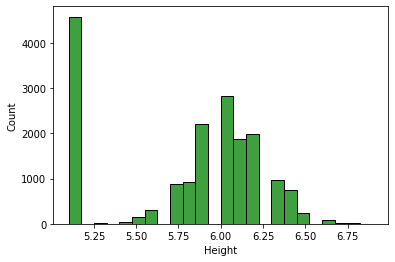

In [19]:
sns.histplot(x = df['Height'], color='green')

#### Most of the Heights we get below 5.25 and around 6

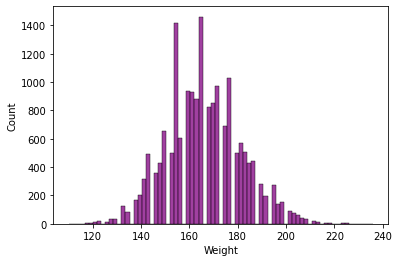

In [20]:
sns.histplot(x = df['Weight'], color='purple')

#### Most of the Player' s Weight is around 150-180

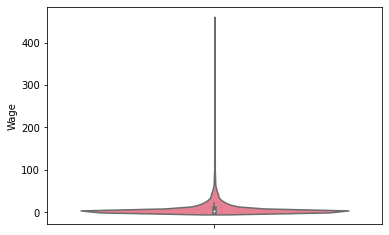

In [21]:
sns.violinplot(y = df['Wage'], palette='husl')

#### Most of the Players has less than €100k 

In [22]:
df.groupby(by = 'Work Rate')['Wage'].mean()

Work Rate
High/ High        21.499503
High/ Low         11.572263
High/ Medium      13.167146
Low/ High          8.498851
Low/ Low           5.151515
Low/ Medium        6.852273
Medium/ High      12.642169
Medium/ Low        9.651190
Medium/ Medium     7.070647
Name: Wage, dtype: float64

These are Wages for different category of Work Rate. 

In [23]:
pd.crosstab(index = df['Preferred Foot'], columns= df['International Reputation'])

International Reputation,1.0,2.0,3.0,4.0,5.0
Preferred Foot,,,,,
Left,3794,287,63,14,0
Right,12510,961,243,36,3


#### Most of the players use Right Foot as their Preferred Foot

In [24]:
df['Nationality'].value_counts()

England        1656
Germany        1195
Spain          1071
Argentina       934
France          911
               ... 
Belize            1
Liberia           1
South Sudan       1
Puerto Rico       1
Nicaragua         1
Name: Nationality, Length: 163, dtype: int64

#### Total 5 Countries with maximum players :
1. England 
2. Germany 
3. Spain
4. Argentina
5. France

In [25]:
df.loc[df['Potential'] >90]['Age'].count()

26

#### Only 26 Players have Potential equal or greater than 26

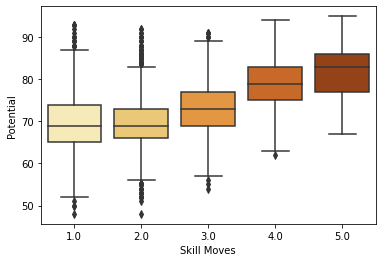

In [26]:
sns.boxplot(x = df['Skill Moves'], y= df['Potential'], palette='YlOrBr')

#### Higher the Skills of a player, Higher will be the Potential

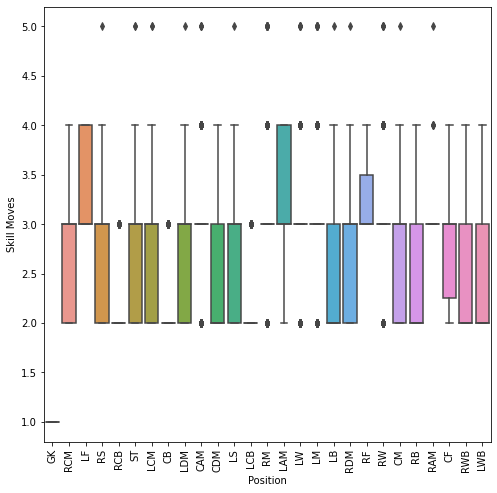

In [27]:
plt.figure(figsize=(8,8))
sns.boxplot(x = df['Position'], y=df['Skill Moves'])
plt.xticks(rotation=90)
plt.show()

#### Positions like LF, LAM, RF need higher skills as compared to other positions

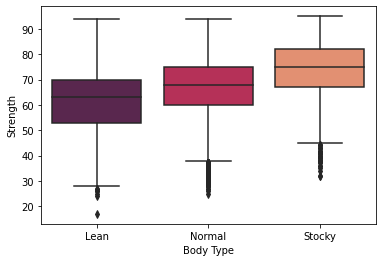

In [28]:
sns.boxplot(x = df['Body Type'], y=df['Strength'], palette='rocket')

#### There is difference of Strength between Lean, Normal and Stocky Players

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17911 entries, 3 to 18206
Data columns (total 52 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       17911 non-null  int64  
 1   Nationality               17911 non-null  object 
 2   Overall                   17911 non-null  int64  
 3   Potential                 17911 non-null  int64  
 4   Club                      17911 non-null  object 
 5   Value                     17911 non-null  int32  
 6   Wage                      17911 non-null  int32  
 7   Special                   17911 non-null  int64  
 8   Preferred Foot            17911 non-null  object 
 9   International Reputation  17911 non-null  float64
 10  Weak Foot                 17911 non-null  float64
 11  Skill Moves               17911 non-null  float64
 12  Work Rate                 17911 non-null  object 
 13  Body Type                 17911 non-null  object 
 14  Positi

## Data Preparation

In [30]:
# Encoding the categorical columns
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['Nationality'] = label_encoder.fit_transform(df['Nationality'])
df['Club'] = label_encoder.fit_transform(df['Club'])
df['Preferred Foot'] = label_encoder.fit_transform(df['Preferred Foot'])
df['Work Rate'] = label_encoder.fit_transform(df['Work Rate'])
df['Body Type'] = label_encoder.fit_transform(df['Body Type'])
df['Position'] = label_encoder.fit_transform(df['Position'])

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17911 entries, 3 to 18206
Data columns (total 52 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       17911 non-null  int64  
 1   Nationality               17911 non-null  int64  
 2   Overall                   17911 non-null  int64  
 3   Potential                 17911 non-null  int64  
 4   Club                      17911 non-null  int64  
 5   Value                     17911 non-null  int32  
 6   Wage                      17911 non-null  int32  
 7   Special                   17911 non-null  int64  
 8   Preferred Foot            17911 non-null  int64  
 9   International Reputation  17911 non-null  float64
 10  Weak Foot                 17911 non-null  float64
 11  Skill Moves               17911 non-null  float64
 12  Work Rate                 17911 non-null  int64  
 13  Body Type                 17911 non-null  int64  
 14  Positi

In [32]:
# Standardizing the Data
from sklearn.preprocessing import StandardScaler
standardization = StandardScaler()
Standardized_data = standardization.fit_transform(df)

# Clustering Data

## 1. K-Means

In [33]:
from sklearn.cluster import KMeans
clusters = [3,5,7]
inertia_list  = []
for c in clusters:
    kmeans = KMeans(n_clusters = c, init = 'k-means++')
    kmeans.fit(Standardized_data)
    inertia_list.append(kmeans.inertia_)

In [34]:
temp_df = pd.DataFrame({'Clusters' : clusters, 'Inertia':inertia_list})
temp_df.head()

,Clusters,Inertia
0,3,538705.085639
1,5,462103.200783
2,7,426883.890912


Text(0, 0.5, 'Inertia')

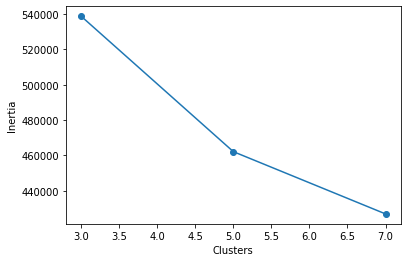

In [35]:
plt.plot(temp_df['Clusters'], temp_df['Inertia'], marker='o')
plt.xlabel('Clusters')
plt.ylabel('Inertia')

In [36]:
from sklearn.metrics import silhouette_score
clusters = [3,5,7]
silhouette_list = []
for c in clusters:
    kmeans = KMeans(n_clusters = c, init = 'k-means++')
    kmeans.fit(Standardized_data)
    category = kmeans.predict(Standardized_data)
    silhouette_list.append(silhouette_score(Standardized_data, category))

In [37]:
temp_df['Silhouette Score'] = silhouette_list

In [38]:
temp_df

,Clusters,Inertia,Silhouette Score
0,3,538705.085639,0.185654
1,5,462103.200783,0.149889
2,7,426883.890912,0.145580


## 2. Hierarchical Clustering

In [39]:
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

In [40]:
mergings = linkage(Standardized_data, method="centroid", metric="euclidean")

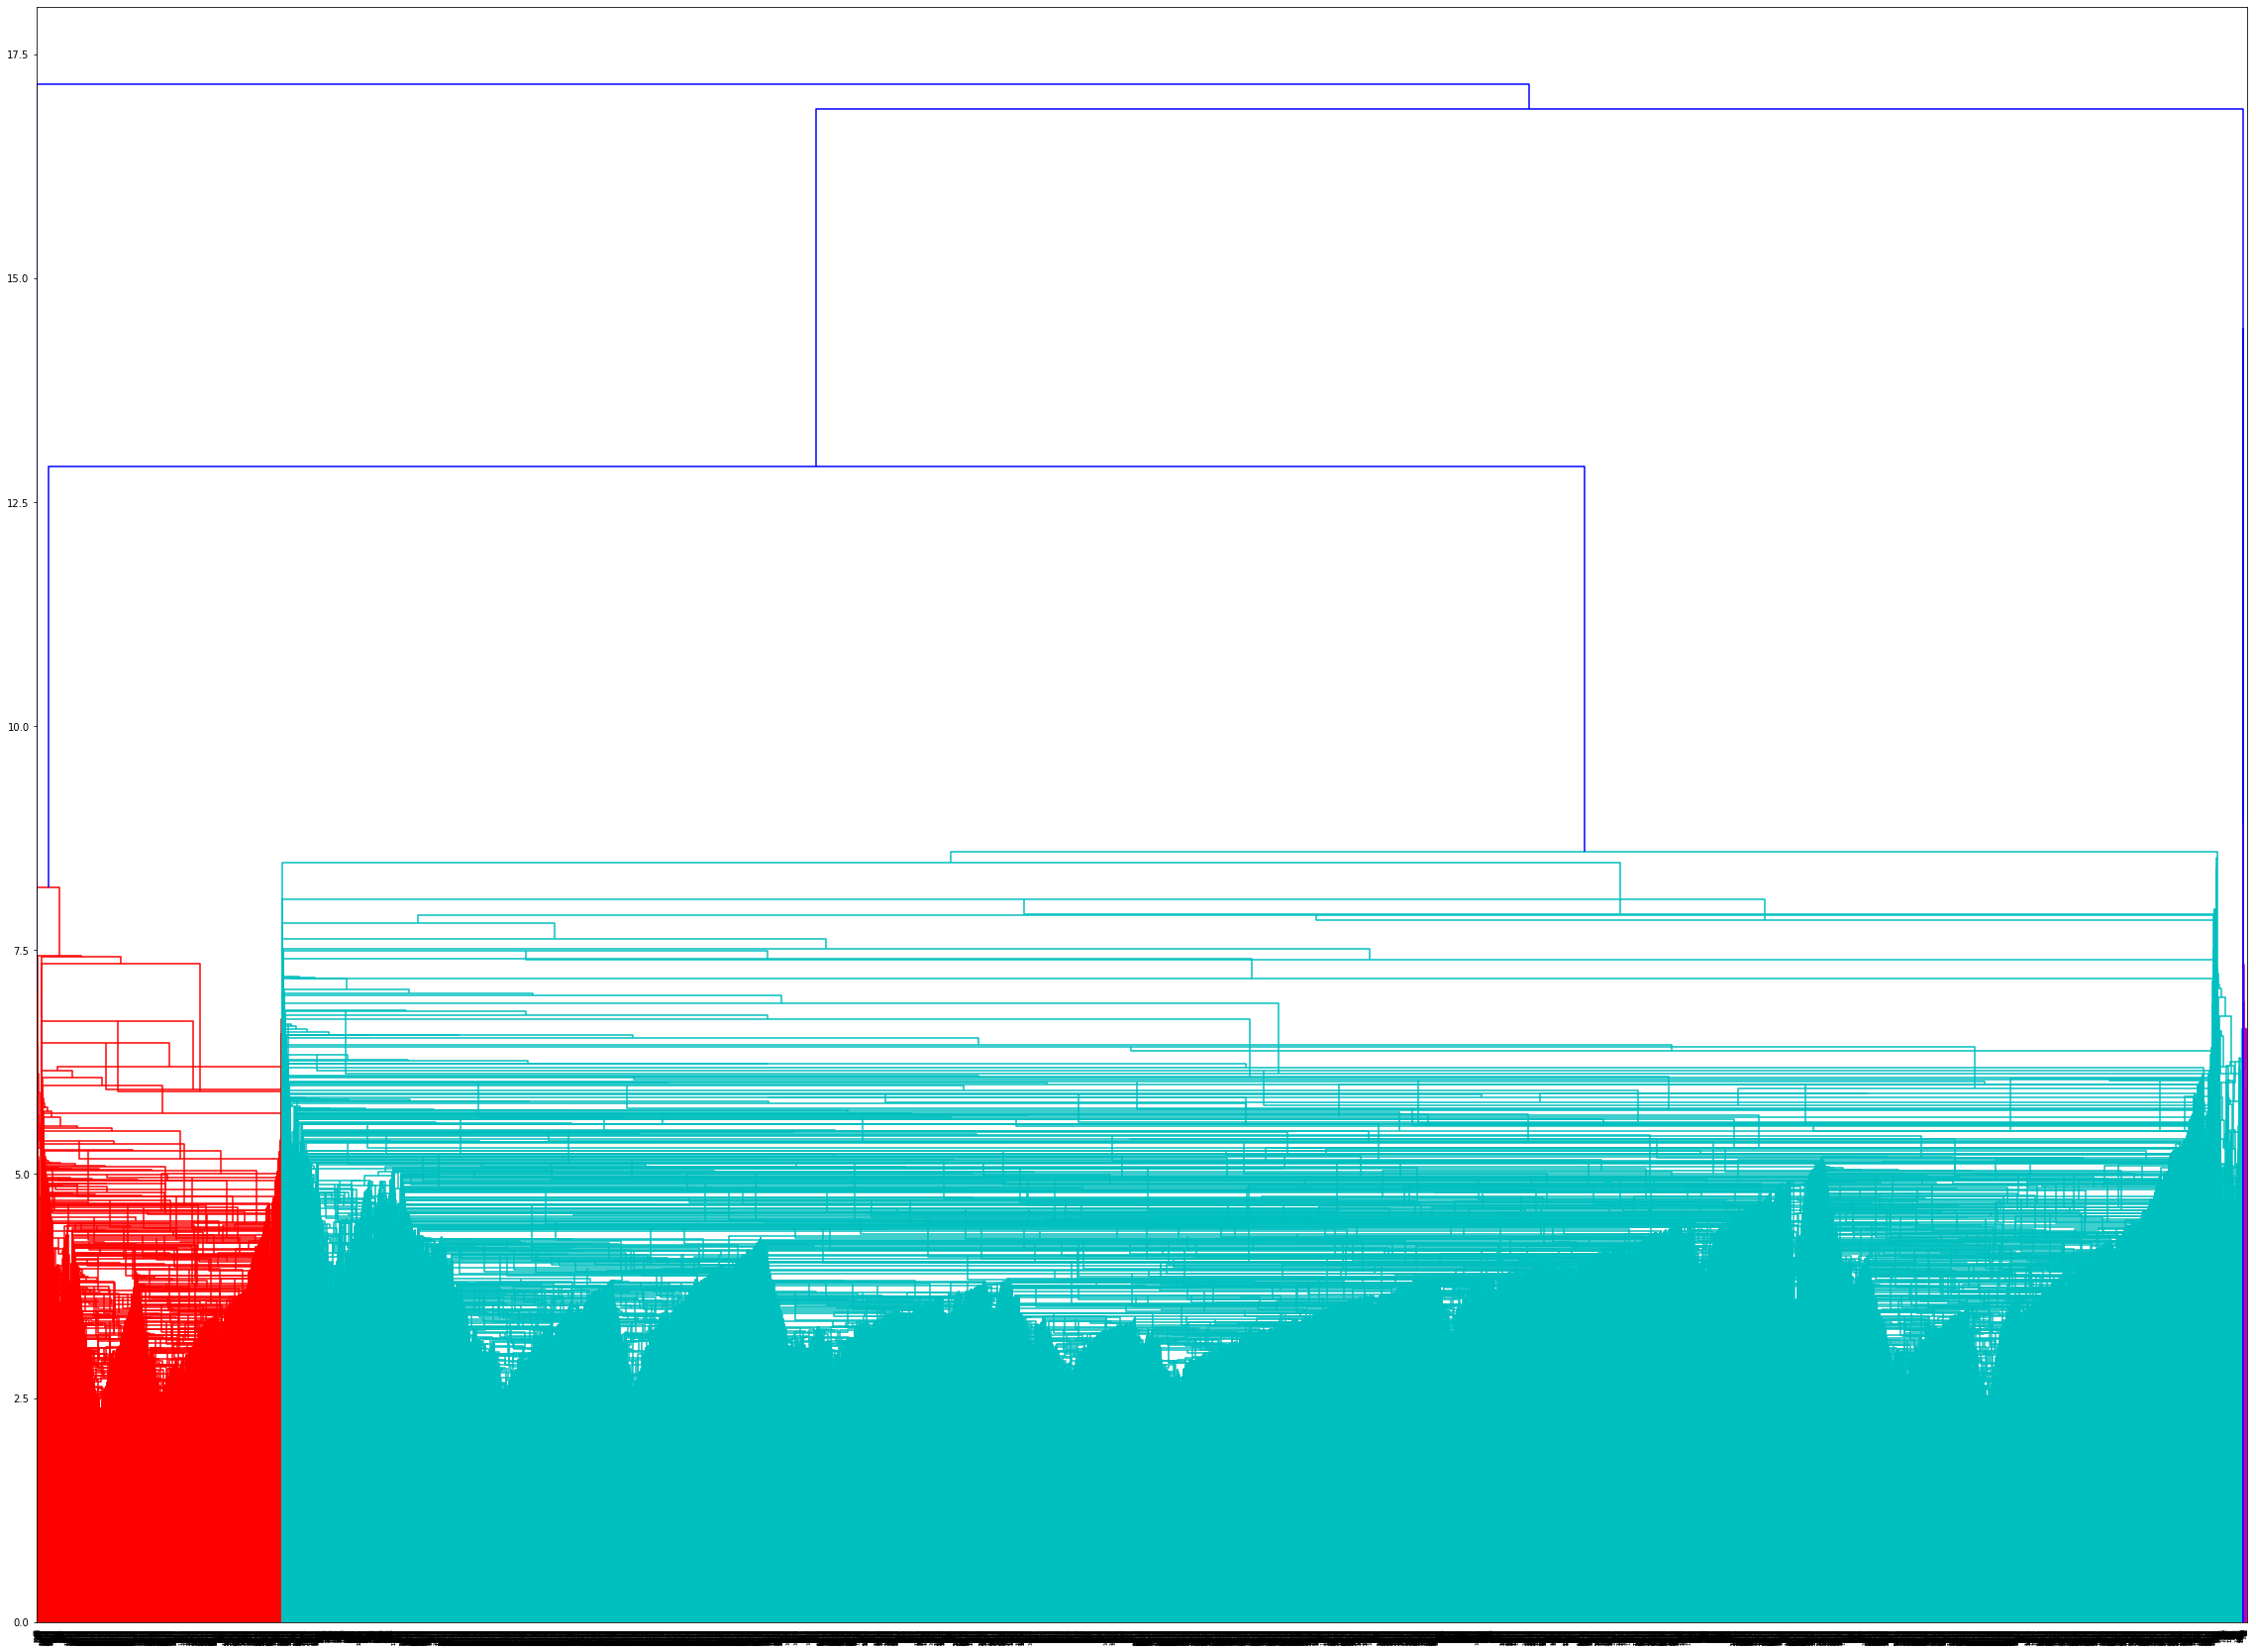

In [44]:
plt.figure(figsize = (40, 30))
dendrogram(mergings)
plt.show()

In [53]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')  
Labels = cluster.fit_predict(Standardized_data)

In [58]:
from sklearn.metrics import davies_bouldin_score
davies_bouldin_score(Standardized_data, Labels)

1.9971486388847133

## 3. DBScan

In [82]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps =5, min_samples = 1000)
dbscan.fit(Standardized_data)

DBSCAN(eps=5, min_samples=1000)

In [86]:
Labels1 = dbscan.labels_

In [85]:
from sklearn.metrics import davies_bouldin_score
davies_bouldin_score(Standardized_data, Labels)

4.143968175055165

In [88]:
from sklearn.cluster import DBSCAN
dbscan_2 = DBSCAN(eps =7, min_samples = 1000)
dbscan_2.fit(Standardized_data)

DBSCAN(eps=7, min_samples=1000)

In [89]:
Labels2 = dbscan_2.labels_

In [90]:
from sklearn.metrics import davies_bouldin_score
davies_bouldin_score(Standardized_data, Labels2)

1.0149981160472072